In [1]:
from netCDF4 import Dataset,netcdftime,num2date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import time
import datetime
import os
import xarray as xray
from mpas_xarray import preprocess_mpas, remove_repeated_time_index

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 10) # Large figures
dpi=200;

In [2]:
# set the file names
rootPath = '/lustre/scratch1/turquoise/lvanroekel/init_ziso/ocean/ziso/2.5km/default/forward/'
meshFile = os.path.join(rootPath, 'init.nc')
forcingFile = os.path.join(rootPath, 'forcing.nc')
outputFile = os.path.join(rootPath, 'analysis_members/waterMassCensus.00*.nc')

In [3]:
meshData = xray.open_mfdataset(meshFile);
forcingData = xray.open_mfdataset(forcingFile);
outputData = xray.open_mfdataset(outputFile, preprocess=preprocess_mpas);
outputData = remove_repeated_time_index(outputData)

nCells = meshData.dims['nCells'];
nVertices = meshData.dims['nVertices'];
nEdges = meshData.dims['nEdges'];
nTemperatureBins = outputData.dims['nTemperatureBins'];
nSalinityBins = outputData.dims['nSalinityBins'];
nTime = outputData.dims['Time'];
nRegions = outputData.dims['nOceanRegionsTmpCensus'];

print 'mesh file: ', meshFile
print 'forcing file: ', forcingFile
print 'output file: ', outputFile
print 'nTemperatureBins: ', nTemperatureBins
print 'nSalinityBins: ', nSalinityBins
print 'nCells: ', nCells
print 'nVertices: ', nVertices
print 'nEdges: ', nEdges
print 'nTime: ', nTime
print 'nRegions: ', nRegions

mesh file:  /lustre/scratch1/turquoise/lvanroekel/init_ziso/ocean/ziso/2.5km/default/forward/init.nc
forcing file:  /lustre/scratch1/turquoise/lvanroekel/init_ziso/ocean/ziso/2.5km/default/forward/forcing.nc
output file:  /lustre/scratch1/turquoise/lvanroekel/init_ziso/ocean/ziso/2.5km/default/forward/analysis_members/waterMassCensus.00*.nc
nTemperatureBins:  32
nSalinityBins:  20
nCells:  337528
nVertices:  677180
nEdges:  1014708
nTime:  164
nRegions:  7


In [4]:
xTime = outputData.xtime.values;
print type(xTime)
timeLength = xTime.shape[0]
print timeLength
timeIncrement = 5.0
timeAxis = np.arange(0, timeLength*timeIncrement, 5.0)

<type 'numpy.ndarray'>
164


In [5]:
waterMassCensusTemperatureValues = outputData.waterMassCensusTemperatureValues.values;
waterMassCensusSalinityValues = outputData.waterMassCensusSalinityValues.values;
temperatureBinBoundaryValues = np.squeeze(waterMassCensusTemperatureValues[0,0,:])
temperatureValues = (temperatureBinBoundaryValues + np.roll(temperatureBinBoundaryValues,-1))/2.0
temperatureValues = temperatureValues[0:temperatureValues.size-1]
print temperatureValues

[-1.8125 -1.4375 -1.0625 -0.6875 -0.3125  0.0625  0.4375  0.8125  1.1875
  1.5625  1.9375  2.3125  2.6875  3.0625  3.4375  3.8125  4.1875  4.5625
  4.9375  5.3125  5.6875  6.0625  6.4375  6.8125  7.1875  7.5625  7.9375
  8.3125  8.6875  9.0625  9.4375  9.8125]


In [6]:
waterMassFractionalDistribution = np.squeeze(outputData.waterMassFractionalDistribution[:,nRegions-1,:,:].values)
waterMassFractionalDistribution = np.squeeze(np.sum(waterMassFractionalDistribution,axis=1))
print waterMassFractionalDistribution.shape

(164, 32)


In [7]:
axis_font = {'fontname':'Arial', 'size':'36'}    
title_font = {'fontname':'Arial', 'size':'36', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

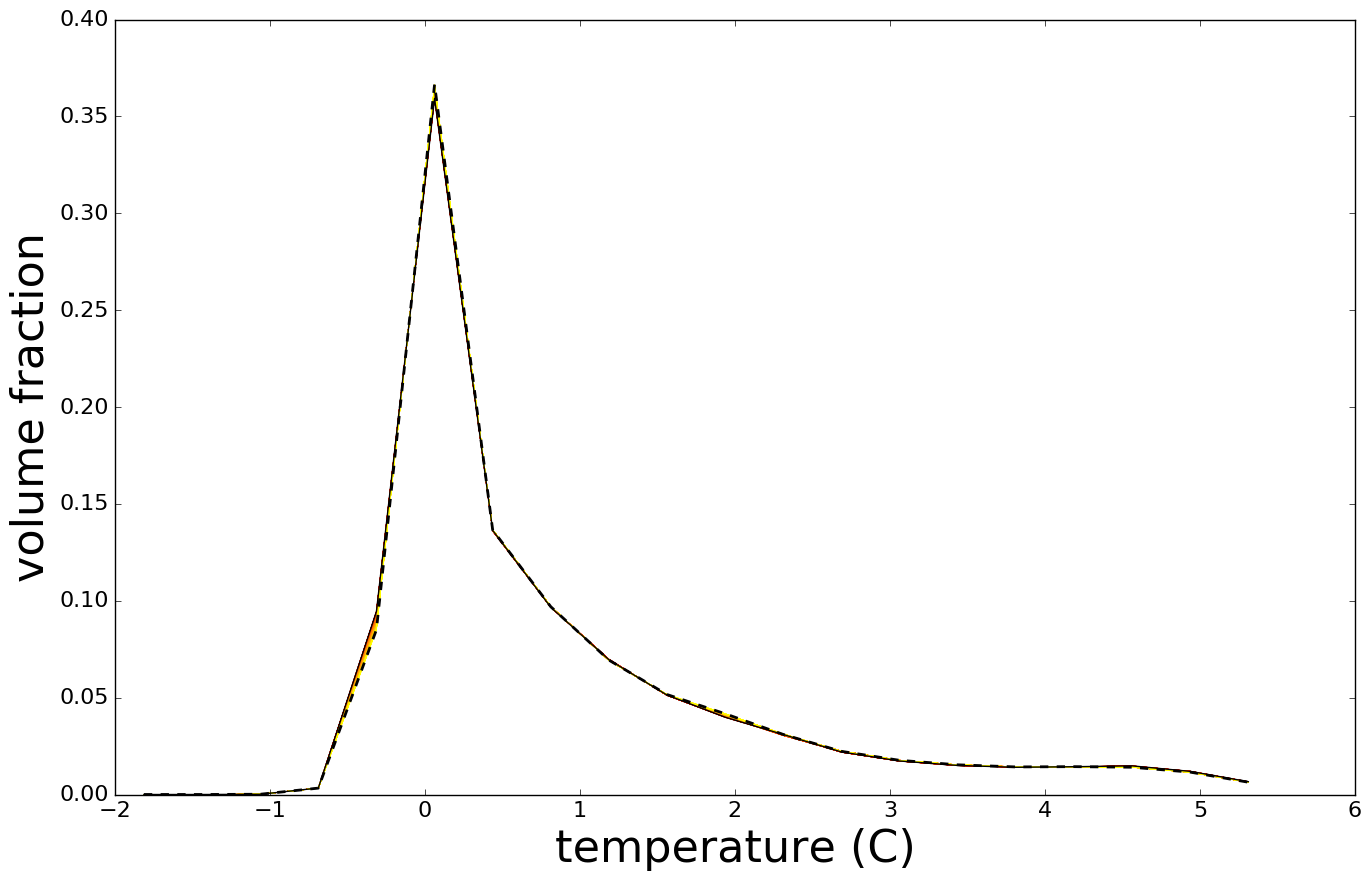

In [8]:
cmap = matplotlib.cm.autumn
iTempMin = 0
iTempMax = 20
for i, y in enumerate(waterMassFractionalDistribution):
    plt.plot(temperatureValues[iTempMin:iTempMax], 
             waterMassFractionalDistribution[i,iTempMin:iTempMax],
             color=cmap(i / float(nTime)),
             linewidth=0.5)

plt.plot(temperatureValues[iTempMin:iTempMax], 
             waterMassFractionalDistribution[nTime-1,iTempMin:iTempMax],
             '--k',
             linewidth=2.0)

plt.plot(temperatureValues[iTempMin:iTempMax], 
             waterMassFractionalDistribution[0,iTempMin:iTempMax],
             color='k',
             linewidth=1.0)

plt.grid
plt.xlabel('temperature (C)',fontsize=32)
plt.ylabel('volume fraction',fontsize=32)

plt.savefig('ZISO-TPG.WaterVolumeCensus.png')

In [9]:
#cmap = mpl.cm.autumn
#plt.pcolormesh(timeAxis, temperatureValues, ma.masked_less(waterMassFractionalDistribution.T, 0.001), cmap=cmap)
#plt.colorbar